In [3]:
import pandas as pd
import glob
import os
from importlib.machinery import SourceFileLoader
import warnings
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns 

## Load data and modules

Import egemaps extraction module

In [7]:
code_path='/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/extract_egemaps.py'
extract_egemaps = SourceFileLoader("extract_features", code_path).load_module() 

Import utils

In [8]:
format_code_path='/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/utils.py'
utils=SourceFileLoader("format_data", format_code_path).load_module() 

Import modeling

In [9]:
modeling_code_path='/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py'
modeling=SourceFileLoader("cross_val", modeling_code_path).load_module() 

Load manual annotations

In [10]:
music_annot_df=pd.read_csv('../data/manual_music_annotations/df_music_labels.csv',index_col=0)
no_music_list=music_annot_df[music_annot_df['music']==0].name
music_list=music_annot_df[music_annot_df['music']==1].name

In [11]:
no_speech_files='/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/silero/silero_no_speech'

no_music_paths=[]
for dir_nm in no_music_list:
    no_music_paths.append(glob.glob(os.path.join(no_speech_files,'*',dir_nm))[0])

music_paths=[]
for dir_m in music_list:
    music_paths.append(glob.glob(os.path.join(no_speech_files,'*',dir_m))[0])

## Extract egemaps

In [8]:
no_music_features_path='/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/features/egemaps_silero_no_speech_no_music_manual_annot.csv'
music_features_path='/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/features/egemaps_silero_no_speech_music_manual_annot.csv'

Extract no music features

In [41]:
audio_duration=2

In [45]:
extract_egemaps.extract_features(no_music_features_path,no_music_paths,audio_duration)

32000


100%|██████████| 146/146 [00:12<00:00, 11.50it/s]


Extract music features

In [46]:
extract_egemaps.extract_features(music_features_path,music_paths,audio_duration)

32000


100%|██████████| 170/170 [00:14<00:00, 11.37it/s]


## Prepare data

In [9]:
feat_df_nm=pd.read_csv('../data/features/egemaps_silero_no_speech_no_music_manual_annot.csv')
feat_df_m=pd.read_csv('../data/features/egemaps_silero_no_speech_music_manual_annot.csv')
labels_df=pd.read_csv('../data/labels/new_partitions-labels.csv')

No speech + No music

In [10]:
df_no_music=utils.format_data(feat_df_nm,labels_df)

No speech + Music

In [11]:
df_music=utils.format_data(feat_df_m,labels_df)

## Train models

In [12]:
label_tags=['extraversion', 'neuroticism','agreeableness', 'conscientiousness', 'openness']
feature_tags=feat_df_m.columns[~feat_df_m.columns.isin(['Name','Part'])]

No speech + Music

In [56]:
warnings.filterwarnings('ignore')
df_metrics_music,feature_importance_music,y_val_music,predictions=modeling.cross_val(df_music,feature_tags,label_tags,n_folds=5)

In [14]:
df_metrics_music

,r2,r,MAE,MSE,RMSE,fold
0,0.039662,0.199154,0.109352,0.017875,0.133698,0.0
1,-0.056072,NaN,0.096856,0.015143,0.123056,1.0
2,-0.044932,NaN,0.103278,0.016650,0.129034,2.0
3,-0.095075,NaN,0.096202,0.014079,0.118654,3.0
4,-0.317480,NaN,0.097855,0.014315,0.119644,4.0


No speech + No music

In [15]:
df_metrics_no_music,feature_importance_no_music,y_val_no_music=modeling.cross_val(df_no_music,feature_tags,label_tags,n_folds=5)

/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]
/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]
/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]
/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]
/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]


In [16]:
df_metrics_no_music

,r2,r,MAE,MSE,RMSE,fold
0,-0.145872,NaN,0.101491,0.015624,0.124996,0.0
1,-0.208500,NaN,0.128024,0.025104,0.158442,1.0
2,-0.034978,NaN,0.121139,0.023068,0.151881,2.0
3,-0.187736,NaN,0.134013,0.026615,0.163142,3.0
4,-0.177664,NaN,0.100237,0.015143,0.123059,4.0


No speech - Valid Silero with duration > 2 sec and trimmed at 2 seconds 

In [23]:
df=pd.concat([df_no_music,df_music],ignore_index=True)

In [24]:
df

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Name,extraversion,neuroticism,agreeableness,conscientiousness,openness,Partition,basename
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-62.337875,uwUkp63db18.005.wav,0.242991,0.635417,0.417582,0.660194,0.355556,Train,uwUkp63db18
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-68.395905,zNmuwZkaeVg.001.wav,0.289720,0.354167,0.472527,0.388350,0.344444,Test,zNmuwZkaeVg
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-63.172516,uwUkp63db18.004.wav,0.233645,0.291667,0.384615,0.621359,0.322222,Train,uwUkp63db18
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-53.247980,yOzHZOg95Ug.000.wav,0.214953,0.322917,0.296703,0.446602,0.233333,Train,yOzHZOg95Ug
4,46.020466,0.001154,45.976227,46.001550,46.063700,0.087475,0.732803,0.000000,3.223114,0.000000,...,0.815000,-59.912260,v5hZeuRW6m0.003.wav,0.186916,0.427083,0.428571,0.417476,0.522222,Val,v5hZeuRW6m0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,21.852333,0.298378,17.148163,19.643951,25.994820,8.846657,0.298301,0.000000,55.006287,0.000000,...,0.248231,-37.415604,2T3oK1Gse2g.004.wav,0.654206,0.572917,0.637363,0.485437,0.633333,Val,2T3oK1Gse2g
312,28.918890,0.317420,22.061678,22.109802,41.045380,18.983702,95.364440,46.859840,176.039110,107.322290,...,0.128530,-44.122757,zEyRyTnIw5I.001.wav,0.214953,0.458333,0.362637,0.601942,0.333333,Train,zEyRyTnIw5I
313,42.719242,0.093530,39.979843,41.972950,45.644200,5.664356,65.902960,56.582417,82.335820,53.658962,...,0.004000,-33.869644,qoZwA4ESb7g.001.wav,0.299065,0.375000,0.483516,0.368932,0.477778,Train,qoZwA4ESb7g
314,43.384120,0.207473,34.705680,39.881733,55.092194,20.386513,162.407730,71.661476,87.872856,62.009914,...,0.436291,-37.549953,YjXUMygVw7U.004.wav,0.289720,0.510417,0.516484,0.543689,0.500000,Test,YjXUMygVw7U


In [26]:
df_metrics_all,feature_importance_all,y_val_all=modeling.cross_val(df,feature_tags,label_tags,n_folds=5)

/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]
/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]
/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]
/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]
/home/gbarchi/Documentos/Trust/OCEAN-TRUST/src/modeling.py:387: RuntimeWarning: invalid value encountered in sqrt
  metrics=[r2_all,np.sqrt(r2_all),MAE_all,MSE_all,RMSE_all,fold]


In [27]:
df_metrics_all

,r2,r,MAE,MSE,RMSE,fold
0,-0.075555,NaN,0.119682,0.021742,0.147453,0.0
1,-0.081977,NaN,0.099154,0.015918,0.126168,1.0
2,-0.035536,NaN,0.103037,0.016466,0.128321,2.0
3,-0.040531,NaN,0.117068,0.020104,0.141788,3.0
4,-0.084068,NaN,0.110544,0.018842,0.137265,4.0


## Multiple cross-val

Valid silero non-speech samples with music

In [13]:
warnings.filterwarnings('ignore')
df_final_music=pd.DataFrame()
for i in tqdm.tqdm(range(100)):
    df_metrics_music,feature_importance_music,y_val_music=modeling.cross_val(df_music,feature_tags,label_tags,n_folds=5)
    df_metrics_music['seed']=i
    df_metrics_music['filter']='Music'
    df_metrics_music['audio_type']='Valid non-speech Silero (2 sec)'
    df_final_music=pd.concat([df_final_music,df_metrics_music])

100%|██████████| 100/100 [01:50<00:00,  1.11s/it]


In [14]:
df_final_music_unique=df_final_music.drop_duplicates(subset='seed')

Valid silero non-speech samples without music

In [15]:
warnings.filterwarnings('ignore')
df_final_no_music=pd.DataFrame()
for i in range(100):
    df_metrics_no_music,feature_importance_no_music,y_val_no_music=modeling.cross_val(df_no_music,feature_tags,label_tags,n_folds=5)
    df_metrics_no_music['seed']=i
    df_metrics_no_music['filter']='No Music'
    df_metrics_no_music['audio_type']='Valid non-speech Silero (2 sec)'
    df_final_no_music=pd.concat([df_final_no_music,df_metrics_no_music])   

In [16]:
df_final_no_music_unique=df_final_no_music.drop_duplicates(subset='seed')

All valid silero non-speech samples

In [17]:
df=pd.concat([df_no_music,df_music],ignore_index=True)

In [18]:
warnings.filterwarnings('ignore')
df_final=pd.DataFrame()
for i in range(100):
    df_metrics_all,feature_importance_all,y_val_all=modeling.cross_val(df,feature_tags,label_tags,n_folds=5)
    df_metrics_all['seed']=i
    df_metrics_all['filter']='All'
    df_metrics_all['audio_type']='Valid non-speech Silero (2 sec)'
    df_final=pd.concat([df_final,df_metrics_all])   

In [19]:
df_final_unique=df_final.drop_duplicates(subset='seed')

In [20]:
df_=pd.concat([df_final_unique,df_final_music_unique,df_final_no_music_unique])

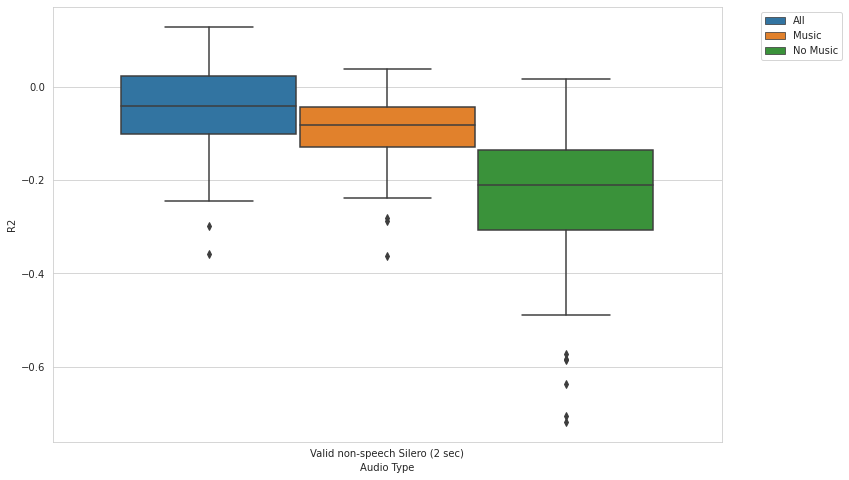

In [22]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.boxplot(data=df_,x='audio_type',y='r2',hue='filter')
ax.set(xlabel='Audio Type', ylabel='R2')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## Silero Valid (n=1399) vs long duration subset (n=316)

In [1]:
long_dur='/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/lists/silero_valid_split_no_speech_greater_2sec.txt'
silero_valid='/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/lists/silero_th_0.5_no_speech.txt'

with open (long_dur) as file:
    long_dur_list=file.read().splitlines()

with open (silero_valid) as file:
    silero_valid_list=file.read().splitlines()

Load and filter features

In [4]:
features_no_speech=pd.read_csv('../data/features/new_partitions-egemaps_silero_no_speech.csv')
features_long_dur=features_no_speech[features_no_speech['Name'].isin(long_dur_list)]
features_silero_valid=features_no_speech[features_no_speech['Name'].isin(silero_valid_list)]

Format data

In [13]:
labels_df=pd.read_csv('../data/labels/new_partitions-labels.csv')
df_silero_valid=utils.format_data(features_silero_valid,labels_df)
df_long_dur=utils.format_data(features_long_dur,labels_df)

Train models

Silero valid

In [46]:
warnings.filterwarnings('ignore')
df_final_sv=pd.DataFrame()
for i in tqdm.tqdm(range(100)):
    df_metrics_sv,feature_importance_sv,y_val_sv=modeling.cross_val(df_silero_valid,feature_tags,label_tags,n_folds=5)
    df_metrics_sv['seed']=i
    df_metrics_sv['filter']='All'
    df_metrics_sv['audio_type']='Valid non-speech Silero'
    df_final_sv=pd.concat([df_final_sv,df_metrics_sv])   

100%|██████████| 100/100 [20:12<00:00, 12.13s/it]


In [49]:
df_final_sv_unique=df_final_sv.drop_duplicates(subset='seed')

Long duration

In [47]:
warnings.filterwarnings('ignore')
df_final_ld=pd.DataFrame()
for i in tqdm.tqdm(range(100)):
    df_metrics_ld,feature_importance_ld,y_val_ld=modeling.cross_val(df_long_dur,feature_tags,label_tags,n_folds=5)
    df_metrics_ld['seed']=i
    df_metrics_ld['filter']='All'
    df_metrics_ld['audio_type']='Valid non-speech long dur'
    df_final_ld=pd.concat([df_final_ld,df_metrics_ld])   

100%|██████████| 100/100 [03:19<00:00,  2.00s/it]


In [50]:
df_final_ld_unique=df_final_ld.drop_duplicates(subset='seed')

In [51]:
df_complete=pd.concat([df_final_ld_unique,df_final_sv_unique])

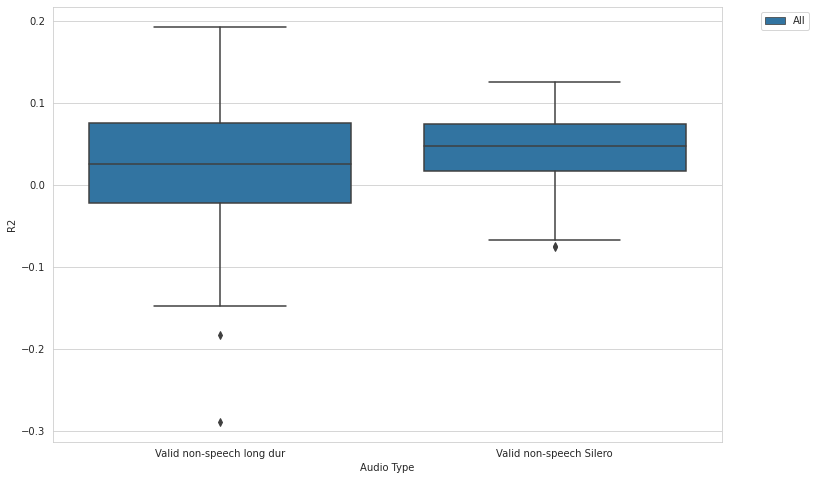

In [52]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.boxplot(data=df_complete,x='audio_type',y='r2',hue='filter')
ax.set(xlabel='Audio Type', ylabel='R2')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

Comparissons 

In [54]:
df_final_=pd.concat([df_complete,df_])

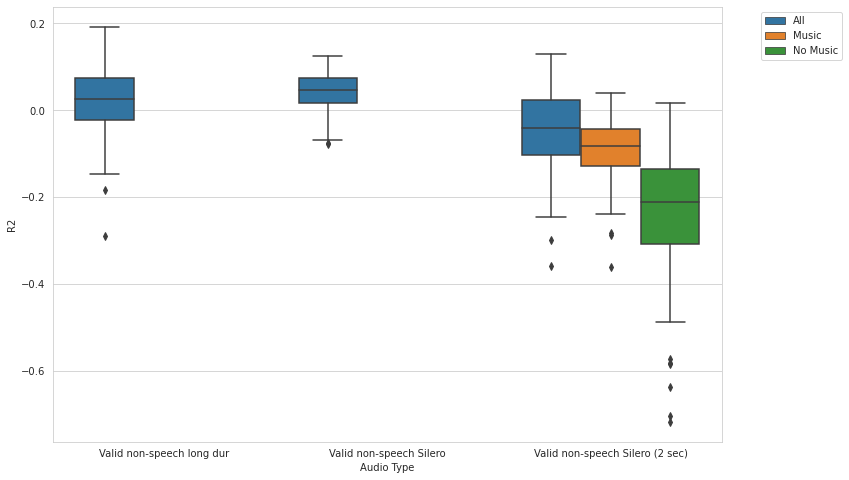

In [55]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.boxplot(data=df_final_,x='audio_type',y='r2',hue='filter')
ax.set(xlabel='Audio Type', ylabel='R2')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

## Add duration as feature

In [17]:
df_dur=pd.read_csv('../data/metadata/non-speech_valid_silero+duration.csv')

Load features

In [ ]:
features_no_speech=pd.read_csv('../data/features/new_partitions-egemaps_silero_no_speech.csv')
features_long_dur=features_no_speech[features_no_speech['Name'].isin(long_dur_list)]
features_silero_valid=features_no_speech[features_no_speech['Name'].isin(silero_valid_list)]

Add duration data to features

In [28]:
feat_silero_valid_dur=pd.merge(df_dur[['filename','Duration']],features_silero_valid,left_on='filename',right_on='Name')
feat_silero_valid_long_dur=pd.merge(df_dur[['filename','Duration']],features_long_dur,left_on='filename',right_on='Name')

Merge features and labels

In [29]:
labels_df=pd.read_csv('../data/labels/new_partitions-labels.csv')
df_silero_valid=utils.format_data(feat_silero_valid_dur,labels_df)
df_long_dur=utils.format_data(feat_silero_valid_long_dur,labels_df)

In [47]:
label_tags=['extraversion', 'neuroticism','agreeableness', 'conscientiousness', 'openness']
feature_tags=feat_silero_valid_dur.columns[~feat_silero_valid_dur.columns.isin(['Name','Part','filename'])]

Train model- Valid silero (duration > 2sec)

In [50]:
warnings.filterwarnings('ignore')
df_final_ld_duration=pd.DataFrame()
for i in tqdm.tqdm(range(100)):
    df_metrics_ld_duration,feature_importance_ld_duration,y_val_ld_duration=modeling.cross_val(df_long_dur,feature_tags,label_tags)
    df_metrics_ld_duration['seed']=i
    df_metrics_ld_duration['filter']='All'
    df_metrics_ld_duration['audio_type']='Valid non-speech long dur'
    df_final_ld_duration=pd.concat([df_final_ld_duration,df_metrics_ld_duration])   

100%|██████████| 100/100 [03:16<00:00,  1.97s/it]


In [51]:
warnings.filterwarnings('ignore')
df_final_silero_valid_duration=pd.DataFrame()
for i in tqdm.tqdm(range(100)):
    df_metrics_silero_valid_duration,feature_importance_silero_valid_duration,y_val_silero_valid_duration=modeling.cross_val(df_silero_valid,feature_tags,label_tags)
    df_metrics_silero_valid_duration['seed']=i
    df_metrics_silero_valid_duration['filter']='All'
    df_metrics_silero_valid_duration['audio_type']='Valid non-speech silero valid'
    df_final_silero_valid_duration=pd.concat([df_final_silero_valid_duration,df_metrics_silero_valid_duration])   

100%|██████████| 100/100 [20:13<00:00, 12.13s/it]


In [52]:
df_final_ld_duration.loc[:,'feature']='egemaps+duration'
df_final_silero_valid_duration.loc[:,'feature']='egemaps+duration'
df_duration=pd.concat([df_final_ld_duration,df_final_silero_valid_duration])

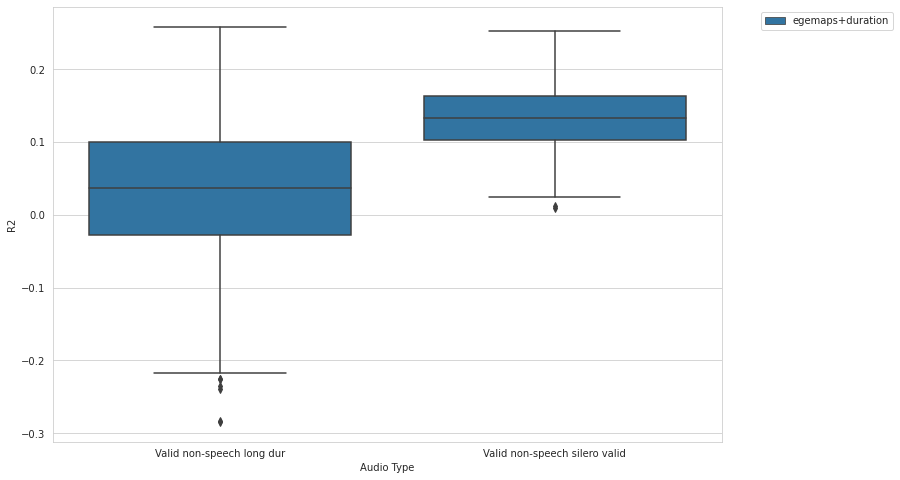

In [61]:
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
ax=sns.boxplot(data=df_duration,x='audio_type',y='r2',hue='feature')
ax.set(xlabel='Audio Type', ylabel='R2')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)